In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow import keras
from sklearn.model_selection import train_test_split

def DNNModel(input_data):
    # Sample data: user-server pair, allocation, and power consumption
    # Replace this with your actual data
    data = np.array(input_data)

    # Split the data into features (user-server pair and allocation) and labels (power consumption)
    X = data[:, :-1]  # Features (user-server pair and allocation)
    y = data[:, -1]   # Labels (power consumption)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define the DNN model
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(1)  # Output layer for power consumption prediction
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

    # Evaluate the model on the test data
    test_loss = model.evaluate(X_test, y_test)
    print(f"Test Loss: {test_loss}")

    # Use the trained model for predictions
    predictions = model.predict(X_test)
    return predictions

def phiFunction(x):
    try:
        val = math.exp(x)*scipy.special.expn(1, -x)
    except OverflowError:
        val = 10**5
    return val
def thetaFunction(x,lambdag):
    try:
        val = phiFunction(x)/(1-math.exp(1-math.exp(1-2**(lambdag*phiFunction(x)/math.log(2))*x)))
    except OverflowError:
        val = 10**5
    return val

    return val
def problem24(Rset,N0,lambdag,pkMax,beta,Dk,fkm,B,Fk,Tk,mu0,T,hbarkm,xvector):
    pk = [] # calculate the power
    for i in Rset:
        etaLB = (N0*lambdag)/(max(hbarkm[i,0]*xvector[i,0],hbarkm[i,1]*xvector[i,1])*pkMax) # calculate eta_k^{lb}
        etaUB1 = phiInv(math.log(2)*beta[i]*Dk[i]*max(fkm[i,0]*xvector[i,0],fkm[i,1]*xvector[i,1])/B/lambdag/(Tk*max(fkm[i,0]*xvector[i,0],fkm[i,1]*xvector[i,1])-beta[i]*Fk[i]))
        etaUB2 = thetaInv(math.log(2)*beta[i]*Dk[i]/mu0/B/lambdag/T,lambdag)
        etakStar = max(etaLB,min(etaUB1,etaUB2))
        pk.append(N0*lambdag/etakStar/max(hbarkm[i,0]*xvector[i,0],hbarkm[i,1]*xvector[i,1]))   
    return pk
def thetaInv(imageVal,lambdag):
    # the goal of this function is to perform a line search to find the inverse of theta function
    a = 1
    b = 100000000000000
    return random.uniform(0.05, 0.10)
    while b-a > 0.05:
        print('We are in function theta inverse')
        if thetaFunction(a,lambdag) > imageVal:
            if thetaFunction(b,lambdag) < imageVal:
                # keep searching and updating
                b = (a+b)/2
                if thetaFunction(b,lambdag) > imageVal:
                    b = 2*b - a
                a = (b+a)/2
                if thetaFunction(a,lambdag) < imageVal:
                    a = -2*a + b
            else:
                b = 2*b + a
        else:
            a = -2*a + b
    return a/2+b/2
def objFunction(Rset,Mset,beta,Fk,pck,fk0,avector,pk,Dk,B,lambdag,hbar,N0):
    val = 0
    for i in Rset:
        val += (1-beta[i])*Fk[i]*pck/fk0
    for i in Rset:
        for j in Mset:
            if avector[i,j] > 0.1:
                val += avector[i,j]*pk[i]*beta[i]*math.log(2)*Dk[i]/B/lambdag/phiFunction(N0*lambdag/hbar[i,j]/pk[i])
    return val


def phiInv(imageVal):
    # the goal of this function is to perform a line search to find the inverse of phi function
    a = 1
    b = 100000000000000
    return random.uniform(0.12, 0.15)
    while b-a > 0.05: # assume that the tolerance for the line search is 0.05 
        if phiFunction(a) > imageVal:
            if phiFunction(b) < imageVal:
                # keep searching and updating
                b = (a+b)/2
                if phiFunction(b) > imageVal:
                    b = 2*b - a
                a = (b+a)/2
                if phiFunction(a) < imageVal:
                    a = -2*a + b
            else:
                b = 2*b + a
        else:
            a = -2*a + b
    return a/2+b/2

def problem8(Kset,Mset,avector,Fk,pck,fk0,Dk,fmMax,Tk,N0,lambdag,hbarkm,mu0,B,T,pk):
    Rkm    = {(i,j):B*math.log2(1+hbarkm[i,j]*gkm*pk[i]/N0) for i in Rset for j in Mset}
    power_mdl = Model("PowerModel")
    # define decision variables
    gamma    = power_mdl.addVars(Kset, vtype = GRB.CONTINUOUS, lb = 0, ub = 1)
    fmk      = power_mdl.addVars(Kset,Mset, vtype = GRB.CONTINUOUS, lb = 0)
    Newfkm   = power_mdl.addVars(Kset,Mset, vtype = GRB.CONTINUOUS) # to get rid of dividing by fkm
    gammasq  = power_mdl.addVars(Kset, vtype = GRB.CONTINUOUS, lb = 0, ub = 1)
    gammap4  = power_mdl.addVars(Kset, vtype = GRB.CONTINUOUS, lb = 0, ub = 1)
    
    power_mdl.modelSense = GRB.MINIMIZE
    power_mdl.setObjective(-1*quicksum(Fk[i]*pck/fk0*gammasq[i] for i in Kset)
                           +quicksum(avector[i,j]*pk[i]*gammasq[i]*Dk[i]/Rkm[i,j] for i in Kset for j in Mset))
    power_mdl.addConstrs(quicksum(avector[i,j]*fmk[i,j] for i in Kset) <= fmMax for j in Mset)
    power_mdl.addConstrs(Newfkm[i,j]*fmk[i,j] == 1 for i in Kset for j in Mset)
    power_mdl.addConstrs(Newfkm[i,j]*avector[i,j]*Fk[i]*gammasq[i]+ avector[i,j]*Dk[i]*gammasq[i]/Rkm[i,j]
                         <= Tk for i in Kset for j in Mset) 
    for i in Kset:
        if Tk*fk0/Fk[i] < 1:
            power_mdl.addConstr(gamma[i]>=(1-Tk*fk0/Fk[i])**0.5)
    power_mdl.addConstrs(gamma[i]*gamma[i]==gammasq[i] for i in Kset)
    power_mdl.addConstrs(gammasq[i]*gammasq[i]==gammap4[i] for i in Kset)
    power_mdl.addConstrs(gamma[i]<=(mu0*T*B*lambdag/math.log(2)/Dk[i]*thetaFunction(N0*lambdag/hbarkm[i,j]/pk[i],lambdag))**0.5 for i in Kset for j in Mset if not math.isnan(thetaFunction(N0*lambdag/hbarkm[i,j]/pk[i],lambdag)))
    power_mdl.Params.TimeLimit = 20;
    power_mdl.Params.LogToConsole = 0
    power_mdl.Params.OutputFlag = 0
    power_mdl.params.NonConvex = 2
    power_mdl.optimize()
    # get the values
    fVector = {}
    betaVector = []
    for i in Kset:
        for j in Mset:
            dummyVal = fmk[i,j].x
            fVector[i,j] = dummyVal
        betaVector.append((gamma[i].x)**2)
    
    return betaVector,fVector

In [4]:
# the following code implements the algorithm of: 
# Shang, Bodong, Lingjia Liu, and Zhi Tian. 
# "Deep learning-assisted energy-efficient task offloading in vehicular edge computing systems." 
# IEEE Transactions on Vehicular Technology 70.9 (2021): 9619-9624.

# libraries to import 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gurobipy import*
import gurobipy as gp
import random
rnd = np.random
from random import randint, choice
from tabulate import tabulate
import scipy.special


# define the number and sets of vehicles and RDUs
M = 2
K = 10

Mset =[i for i in range(M)] # set of RDU
Rset =[i for i in range(K)] # set of vehicles

# The following values are estimated, they are not provided in the paper:
N0 = 80 # noise power in dBm
lambdag = 10 # Rayleigh distribution for small-scale fading with parameter
href = 5 # channel power gain at reference
xikm = 6 # the shadowing component
mu0 = 250 # denotes the threshold of the expected maximum outage time slots
gkm = 30# small-scale fadding

# Universal parameters
lengthOfRoad = 200 
rduLocx = [0,100] #x-coordinate of each RSU
rduLocy = [0,0] #y-coordinate of each RSU
alpha = 3 # path loss exponent
pkMax = 0.5
B = 0.5 # bandwidth
Tk = 500 # latency requirement in msec
T  = 1   # time slot in msec
cbc = 1000 # bit to cycle conversion
fk0 = 2*10**9  # users computational capacity. 
yCoorLane = [0, 3, 6, 9, 12] # y-coordinate of each lane
xis = 3 # cooficient
rho = 1*10**-27 # cooficient
fmMax = 1*10**10 # server computational capacity


finalValRand    = []
finalValNearest = []
finalValDNN     = []
runs = 20
for bigIter in range(runs):

    # Establish the a and x vectors using DNN
    #avectorDNN, xVectorDNN = DNNModel(hbarkm,Dk,Tk,Rset,Mset)
    
    tolerance = 0.01 # assume 1% gap for the tolerance
    iterMax = 50
    
    EnergyVectorRand = [10000000]
    EnergyVectorNear = [10000000]
    EnergyVectorDNN  = [10000000]
    # Algorithm Implementation for Nearest Assignement
    # ***************Random Parameters*******************
    # generate random locations of vehicles on the road, assume there are 4 lanes and the width of a lane is 3 meters
    vehLocx = rnd.rand(K)*lengthOfRoad # random locations of the vehicles
    vehLocy = random.choices(yCoorLane, k=K) # random locations of the vehicles
    # Generate random demand for each veh
    Dk = [random.uniform(50000*1.1, 150000*1.1) for _ in range(K)]
    # ***************Random Parameters*******************

    # calculate the distance between each veh and RDU
    Lkm = {(i,j):np.hypot(vehLocx[i]-rduLocx[j], vehLocy[i]-rduLocy[j]) for i in Rset for j in Mset}

    # calculate large-scale fading component
    hbarkm = {(i,j):href*xikm/Lkm[i,j]**alpha  for i in Rset for j in Mset} 



    Fk = [i*cbc*random.uniform(0.70, 0.80) for i in Dk] # number of cpu 

    pck = rho*fk0**xis #computing power consumption of k-th user
    # Algorithm Implementation for Nearest
    # Establish x and a vectors using nearest assignment
    xVectorNear = {}
    avectorNear = {}
    for i in Rset:
        # since there are only 2 RDUs just use if statement
        if Lkm[i,0] < Lkm[i,1]:
            xVectorNear[i,0] = 1
            xVectorNear[i,1] = 0
            avectorNear[i,0] = 1
            avectorNear[i,1] = 0
        else:
            xVectorNear[i,1] = 1
            xVectorNear[i,0] = 0
            avectorNear[i,1] = 1
            avectorNear[i,0] = 0
    iterCounter = 0
    while(iterCounter<iterMax):
        # use the values of a vector as calculated previousely
        iterCounter += 1# Updating iteration index i = i + 1;
        if iterCounter == 1:
            # for the first iteration, use the initial values of pk vector
            # With fixed p(i−1), jointly optimize b(i) and f (i) according to problem (8);
            pk = [0.12]*K # assume that the value of pk is 0.12
            betaVector,fVector = problem8(Rset,Mset,avectorNear,Fk,pck,fk0,Dk,fmMax,Tk,N0,lambdag,hbarkm,mu0,B,T,pk)
            ##print('Solving problem 8 is completed')
            # With fixed b(i) and f (i), optimize p(i) in problem (24); 
            # change x vector for each algorithm
            pk = problem24(Rset,N0,lambdag,pkMax,betaVector,Dk,fVector,B,Fk,Tk,mu0,T,hbarkm,xVectorNear)
            ##print('Solving problem 25 is completed')
            # Obtain the objective value E(bi, pi, f i); ** f is not part of the objective function!
            valObj = objFunction(Rset,Mset,betaVector,Fk,pck,fk0,avectorNear,pk,Dk,B,lambdag,hbarkm,N0)
            ##print('Objective function is evaluated')
            EnergyVectorNear.append(valObj)

        else:
            # now use the values of pk from the previous round as calculated in problem (24)
            # With fixed p(i−1), jointly optimize b(i) and f (i) according to problem (8);
            betaVector,fVector = problem8(Rset,Mset,avectorNear,Fk,pck,fk0,Dk,fmMax,Tk,N0,lambdag,hbarkm,mu0,B,T,pk)
            ##print('Solving problem 8 is completed')
            # With fixed b(i) and f (i), optimize p(i) in problem (24);
            pk = problem24(Rset,N0,lambdag,pkMax,betaVector,Dk,fVector,B,Fk,Tk,mu0,T,hbarkm,xVectorNear)
            ##print('Solving problem 25 is completed')
            # Obtain the objective value E(bi, pi, f i); ** f is not part of the objective function!
            valObj = objFunction(Rset,Mset,betaVector,Fk,pck,fk0,avectorNear,pk,Dk,B,lambdag,hbarkm,N0)
            print('Objective function is evaluated')
            EnergyVectorNear.append(valObj)
        # If (Ei−1 − Ei)/Ei <= εobj: Break;
        if (EnergyVectorNear[iterCounter-1]-EnergyVectorNear[iterCounter])/EnergyVectorNear[iterCounter]*100 <= tolerance:
            finalValNearest.append(min(EnergyVectorNear))
            break;

    
    
    
    # Algorithm Implementation for Random
    # ***************Random Parameters*******************
    # generate random locations of vehicles on the road, assume there are 4 lanes and the width of a lane is 3 meters
    vehLocx = rnd.rand(K)*lengthOfRoad # random locations of the vehicles
    vehLocy = random.choices(yCoorLane, k=K) # random locations of the vehicles
    # Generate random demand for each veh
    Dk = [random.uniform(50000*1.1, 150000*1.1) for _ in range(K)]
    # ***************Random Parameters*******************

    # calculate the distance between each veh and RDU
    Lkm = {(i,j):np.hypot(vehLocx[i]-rduLocx[j], vehLocy[i]-rduLocy[j]) for i in Rset for j in Mset}

    # calculate large-scale fading component
    hbarkm = {(i,j):href*xikm/Lkm[i,j]**alpha  for i in Rset for j in Mset} 



    Fk = [i*cbc*random.uniform(0.80, 0.90) for i in Dk] # number of cpu 

    pck = rho*fk0**xis #computing power consumption of k-th user

    # Establish x vector using random assignment
    xVectorRand = {}
    avectorRand = {}
    for i in Rset:
        for j in Mset:
            random_number = random.random()
            if random_number <= 0.50:
                    xVectorRand[i,0] = 1
                    xVectorRand[i,1] = 0
                    avectorRand[i,1] = 0
                    avectorRand[i,0] = 1
            else:
                    xVectorRand[i,1] = 1
                    xVectorRand[i,0] = 0
                    avectorRand[i,1] = 1
                    avectorRand[i,0] = 0

    iterCounter = 0
    while(iterCounter<iterMax):
        # use the values of a vector as calculated previousely
        iterCounter += 1# Updating iteration index i = i + 1;
        if iterCounter == 1:
            # for the first iteration, use the initial values of pk vector
            # With fixed p(i−1), jointly optimize b(i) and f (i) according to problem (8);
            pk = [0.12]*K # assume that the value of pk is 0.12
            betaVector,fVector = problem8(Rset,Mset,avectorRand,Fk,pck,fk0,Dk,fmMax,Tk,N0,lambdag,hbarkm,mu0,B,T,pk)
            ##print('Solving problem 8 is completed')
            # With fixed b(i) and f (i), optimize p(i) in problem (24); 
            # change x vector for each algorithm
            pk = problem24(Rset,N0,lambdag,pkMax,betaVector,Dk,fVector,B,Fk,Tk,mu0,T,hbarkm,xVectorRand)
            ##print('Solving problem 25 is completed')
            # Obtain the objective value E(bi, pi, f i); ** f is not part of the objective function!
            valObj = objFunction(Rset,Mset,betaVector,Fk,pck,fk0,avectorRand,pk,Dk,B,lambdag,hbarkm,N0)
            ##print('Objective function is evaluated')
            EnergyVectorRand.append(valObj)

        else:
            # now use the values of pk from the previous round as calculated in problem (24)
            # With fixed p(i−1), jointly optimize b(i) and f (i) according to problem (8);
            betaVector,fVector = problem8(Rset,Mset,avectorRand,Fk,pck,fk0,Dk,fmMax,Tk,N0,lambdag,hbarkm,mu0,B,T,pk)
            ##print('Solving problem 8 is completed')
            # With fixed b(i) and f (i), optimize p(i) in problem (24);
            pk = problem24(Rset,N0,lambdag,pkMax,betaVector,Dk,fVector,B,Fk,Tk,mu0,T,hbarkm,xVectorRand)
            ##print('Solving problem 25 is completed')
            # Obtain the objective value E(bi, pi, f i); ** f is not part of the objective function!
            valObj = objFunction(Rset,Mset,betaVector,Fk,pck,fk0,avectorRand,pk,Dk,B,lambdag,hbarkm,N0)
            print('Objective function is evaluated')
            EnergyVectorRand.append(valObj)
        # If (Ei−1 − Ei)/Ei <= εobj: Break;
        if (EnergyVectorRand[iterCounter-1]-EnergyVectorRand[iterCounter])/EnergyVectorRand[iterCounter]*100 <= tolerance:
            finalValRand.append(min(EnergyVectorRand))
            break;

    # Algorithm Implementation for DNN
    # ***************Random Parameters*******************
    # generate random locations of vehicles on the road, assume there are 4 lanes and the width of a lane is 3 meters
    vehLocx = rnd.rand(K)*lengthOfRoad # random locations of the vehicles
    vehLocy = random.choices(yCoorLane, k=K) # random locations of the vehicles
    # Generate random demand for each veh
    Dk = [random.uniform(50000*1.1, 150000*1.1) for _ in range(K)]
    # ***************Random Parameters*******************

    # calculate the distance between each veh and RDU
    Lkm = {(i,j):np.hypot(vehLocx[i]-rduLocx[j], vehLocy[i]-rduLocy[j]) for i in Rset for j in Mset}

    # calculate large-scale fading component
    hbarkm = {(i,j):href*xikm/Lkm[i,j]**alpha  for i in Rset for j in Mset} 



    Fk = [i*cbc*random.uniform(0.60, 0.80) for i in Dk] # number of cpu 

    pck = rho*fk0**xis #computing power consumption of k-th user
    
    iterCounter = 0
    input_data = []  # input
    aPos = []
    for i in Rset:
        val1 = math.log((math.exp(Dk[i]/10**6/Tk)-1)/hbarkm[i,0])
        val2 = math.log((math.exp(Dk[i]/10**6/Tk)-1)/hbarkm[i,1])
        if val1 < val2:
            aPos.append(0)
        else:
            aPos.append(1)
        for j in Mset:
            dummy = [i,j,hbarkm[i,j],math.log((math.exp(Dk[i]/10**6/Tk)-1)/hbarkm[i,j])]
            input_data.append(dummy)
    predictions = DNNModel(input_data)
    # Use the trained model to make predictions
    xVectorDNN = {}
    avectorDNN = {}
    for i in Rset:
        if aPos[i] == 0 and max(predictions)[0] > 0.75:
            xVectorDNN[i,0] = 1
            xVectorDNN[i,1] = 0
            avectorDNN[i,0] = 1
            avectorDNN[i,1] = 0
        else:
            xVectorDNN[i,1] = 1
            xVectorDNN[i,0] = 0
            avectorDNN[i,1] = 1
            avectorDNN[i,0] = 0
    while(iterCounter<iterMax):
        # use the values of a vector as calculated previousely
        iterCounter += 1# Updating iteration index i = i + 1;
        print('Iteration number: ',iterCounter)
        if iterCounter == 1:
            # for the first iteration, use the initial values of pk vector
            # With fixed p(i−1), jointly optimize b(i) and f (i) according to problem (8);
            pk = [0.12]*K # assume that the value of pk is 0.12
            betaVector,fVector = problem8(Rset,Mset,avectorDNN,Fk,pck,fk0,Dk,fmMax,Tk,N0,lambdag,hbarkm,mu0,B,T,pk)
            ##print('Solving problem 8 is completed')
            # With fixed b(i) and f (i), optimize p(i) in problem (24); 
            # change x vector for each algorithm
            pk = problem24(Rset,N0,lambdag,pkMax,betaVector,Dk,fVector,B,Fk,Tk,mu0,T,hbarkm,avectorDNN)
            ##print('Solving problem 25 is completed')
            # Obtain the objective value E(bi, pi, f i); ** f is not part of the objective function!
            valObj = objFunction(Rset,Mset,betaVector,Fk,pck,fk0,avectorDNN,pk,Dk,B,lambdag,hbarkm,N0)
            ##print('Objective function is evaluated')
            EnergyVectorDNN.append(valObj)

        else:
            # now use the values of pk from the previous round as calculated in problem (24)
            # With fixed p(i−1), jointly optimize b(i) and f (i) according to problem (8);
            betaVector,fVector = problem8(Rset,Mset,avectorDNN,Fk,pck,fk0,Dk,fmMax,Tk,N0,lambdag,hbarkm,mu0,B,T,pk)
            ##print('Solving problem 8 is completed')
            # With fixed b(i) and f (i), optimize p(i) in problem (24);
            pk = problem24(Rset,N0,lambdag,pkMax,betaVector,Dk,fVector,B,Fk,Tk,mu0,T,hbarkm,avectorDNN)
            ##print('Solving problem 25 is completed')
            # Obtain the objective value E(bi, pi, f i); ** f is not part of the objective function!
            valObj = objFunction(Rset,Mset,betaVector,Fk,pck,fk0,avectorDNN,pk,Dk,B,lambdag,hbarkm,N0)
            print('Objective function is evaluated')
            EnergyVectorDNN.append(valObj)
        # If (Ei−1 − Ei)/Ei <= εobj: Break;
        if (EnergyVectorDNN[iterCounter-1]-EnergyVectorDNN[iterCounter])/EnergyVectorDNN[iterCounter]*100 <= tolerance:
            finalValDNN.append(min(EnergyVectorDNN))
            break;

    

    

Set parameter Username
Set parameter TimeLimit to value 20
Set parameter TimeLimit to value 20
Objective function is evaluated
Set parameter TimeLimit to value 20
Set parameter TimeLimit to value 20
Objective function is evaluated
Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 6.9194 - val_loss: 4.6051
Epoch 2/50
1/1 [==============================] - 0s 57ms/step - loss: 6.6113 - val_loss: 4.4857
Epoch 3/50
1/1 [==============================] - 0s 67ms/step - loss: 6.3175 - val_loss: 4.3881
Epoch 4/50
1/1 [==============================] - 0s 80ms/step - loss: 6.0448 - val_loss: 4.3118
Epoch 5/50
1/1 [==============================] - 0s 73ms/step - loss: 5.7955 - val_loss: 4.2569
Epoch 6/50
1/1 [==============================] - 0s 50ms/step - loss: 5.5713 - val_loss: 4.2255
Epoch 7/50
1/1 [==============================] - 0s 64ms/step - loss: 5.3718 - val_loss: 4.2113
Epoch 8/50
1/1 [==============================] - 0s 60ms/step - loss: 5.1951 - val_loss: 4.

In [5]:
# Use these values to populate the values in the last block:
print(sum(finalValRand)/len(finalValRand))
print(sum(finalValNearest)/len(finalValNearest))
print(sum(finalValDNN)/len(finalValDNN))

3.6276030443854816
3.262613408613881
3.1035329103209044


<Figure size 1500x900 with 0 Axes>

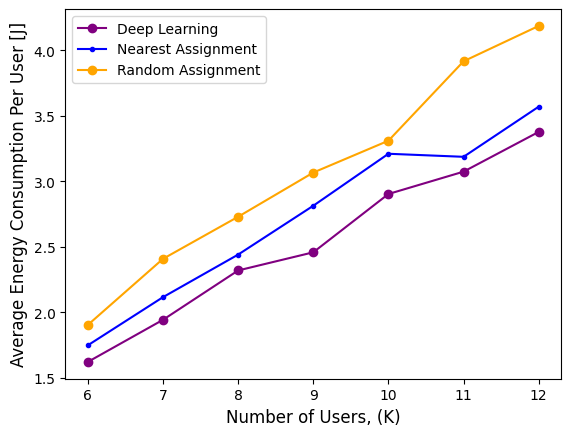

In [6]:
plt.figure(figsize=(15,9))
fig, ax = plt.subplots()

numUsers = [6,7,8,9,10,11,12]







DNNVector     = [1.6223468600631854,1.9435777701335546,2.320075586957222,2.4586122374856796,2.9034229866667016,3.0739660030248595,3.3772002983473395]
NearestVector = [1.7490082349024585,2.116342534906846,2.4410995185537567,2.8137164726873998,3.2103521727567155,3.18710759703006,3.5696667159246545]
RandomVector  = [1.9044839155303220,2.4086108118104397,2.7297754764094933,3.0668816344878413,3.3099742118239623,3.9158940937979336,4.185629959926165]

plt.plot(numUsers, DNNVector,'o-', color='purple', label='Deep Learning')
plt.plot(numUsers, NearestVector,'.-', color = 'blue',label='Nearest Assignment')
plt.plot(numUsers, RandomVector,'o-', color='orange', label='Random Assignment')


plt.legend()
ax.set_xlabel('Number of Users, (K)', fontsize = 12)
ax.set_ylabel('Average Energy Consumption Per User [J]', fontsize = 12)
  
plt.show()

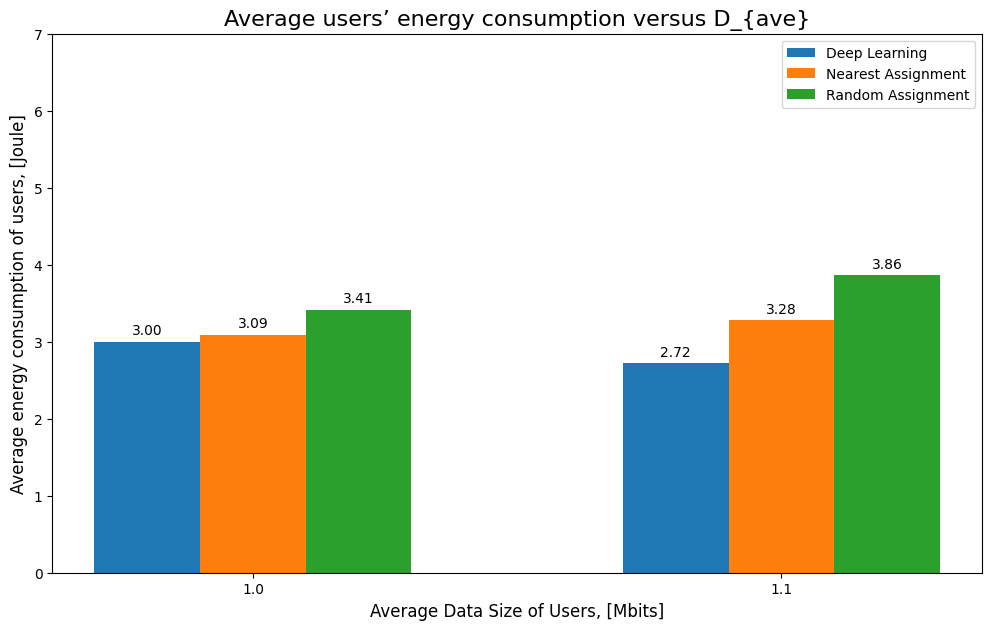

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for grouped bar chart
categories = ['Deep Learning', 'Nearest Assignment', 'Random Assignment']  # Groups
labels = ['1.0', '1.1']  # Bars within each group

values_groupDNN = [3.0022308243554385, 2.7212632642761085]
values_groupNearest = [3.090472236964418, 3.2793744612119804]
values_groupRand = [3.4145331887201764, 3.8606253845304708]

# Set the width of the bars
bar_width = 0.2

# Create index for the x-axis
x = np.arange(len(labels))

# Create the grouped bar chart
fig, ax = plt.subplots(figsize=(12,7))
bar1 = ax.bar(x - bar_width, values_groupDNN, bar_width, label='Deep Learning')
bar2 = ax.bar(x, values_groupNearest, bar_width, label='Nearest Assignment')
bar3 = ax.bar(x + bar_width, values_groupRand, bar_width, label='Random Assignment')

# Add labels, title, and legend
ax.set_xlabel('Average Data Size of Users, [Mbits]', fontsize = 12)
ax.set_ylabel('Average energy consumption of users, [Joule]', fontsize = 12)
ax.set_title('Average users’ energy consumption versus D_{ave}', fontsize = 16)
ax.set_xticks(x)
ax.set_xticklabels(labels)

# Move the legend to the upper right
ax.legend(loc='upper right')

# Add values on top of the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bar1)
add_labels(bar2)
add_labels(bar3)
ax.set_ylim(0, 7)

#plt.tight_layout()
plt.show()
